# Integração Numérica

### Como é calculada a Integral de Riemann

Uma integral de Riemann é calculada através da seguinte equação:

$$\displaystyle\int_a^b f(x)\;dx = \lim_{\|\Delta x_i\| \to 0} \displaystyle\sum_{i = 1}^n f(\xi_i)\Delta x_i$$

onde
- $\Delta x_i$: O tamanho de um subintervalo *i* qualquer dentro do intervalo $[a, b]$
- $f(\xi_i)$: A imagem de um ponto arbitrário escolhido dentro do intervalo $\Delta x_i$

#### Como funciona?:
Uma integral é uma soma de infinitésimos, pequenas partes que compõem um todo. O limite matemático acima garante que o maior subintervalo ($\|\Delta x_i\|$) irá se aproximar de zero, então se o maior subintervalo tende a zero, isso garante que todos os outros também se comportarão da mesma forma. Após isso, é escolhido um ponto dentro de cada subintervalo, que com o limite tendendo a zero, garantirá que cada ponto no intervalo $[a, b]$ seja considerado e que todos os retângulo infinitesimais sejam somados, o que resultará na área total abaixo da curva.

### Código:
---
#### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as scp

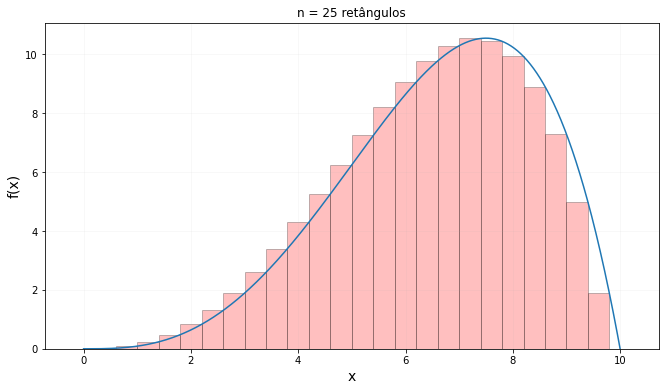

In [22]:
# lim_inf = float("Digite o limite inferior [a]: ")
# lim_sup = float("Digite o limite inferior [b]: ")
# delta_x = float("Digite o tamanho do intervalo [DeltaX]: ")

def f_limits(f_base = "- x ** 3/100 * (x-10)",
                  lim_inf = 0, 
                  lim_sup = 10, 
                  func_delta_x = 0.01):
    """Define os parâmetros iniciais de plotagem da função de base"""

    return lim_inf, lim_sup, func_delta_x
    
def f(x):
    y = - x ** 3/100 * (x-10)
    return y

def vf(x):
    return np.vectorize(f)(x)

func_lim_inf, func_lim_sup, func_delta_x = f_limits()

func_num = (func_lim_sup - func_lim_inf) / func_delta_x
func_interval = np.linspace(func_lim_inf, func_lim_sup, num = int(func_num))

# Number of rectangles
def numerical_integration(num = 10):
    interval = np.linspace(func_lim_inf, func_lim_sup, num = num + 1)
    
    choice = interval[:-1] + np.diff(interval) / 2
    choice = np.insert(choice, choice.shape[0], 10)
    delta = (func_lim_sup - func_lim_inf) / num

    riemann_rect = vf(choice)

    integral_sum = sum(riemann_rect * np.diff(interval)[0])

    return interval, choice, delta, riemann_rect, num, integral_sum

interval, choice, width, riemann_rect, num, integral_sum = numerical_integration(25)

figure, ax = plt.subplots(figsize = (11,6))

plt.xlabel('x', size = 14)
plt.ylabel('f(x)', size = 14)
plt.title(f"n = {num} retângulos")
plt.bar(interval, riemann_rect, width = width , edgecolor="black", alpha = 0.25, color = "red")
plt.plot(func_interval, vf(func_interval))
plt.grid(alpha = 0.1)
plt.show()